<a href="https://colab.research.google.com/github/kimimumemo/Computational-Finance-/blob/main/AAPL%20Weekly%20%26%20Daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Kimberley Blessinda

NPM: 6161801028

Mata Kuliah: Komputasi Keuangan

**Import Dependencies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pylab as py
import pandas as pd
import math 
import seaborn as sns
import scipy

from scipy.stats import norm
from scipy.special import erfinv
from sklearn import preprocessing

###  **Read Data Daily**

In [ ]:
df_daily = pd.read_csv('/content/AAPL-daily.csv')

In [ ]:
df_daily['Daily_return_log'] = np.log(df_daily['Close']/df_daily['Close'].shift(1))

In [ ]:
to_hist_daily = df_daily['Daily_return_log'][1:]

### **Read Data Weekly**

In [ ]:
df_weekly = pd.read_csv('/content/AAPL-weekly.csv')

In [ ]:
df_weekly['Weekly_return_log'] = np.log(df_weekly['Close']/df_weekly['Close'].shift(1))

In [ ]:
to_hist_weekly = df_weekly['Weekly_return_log'][1:]

### **Mean & Standar Deviation for Plot**

In [ ]:
# Fit a normal distribution to the data daily
mu_dlr, std_dlr = norm.fit(to_hist_daily)

In [ ]:
# Fit a normal distribution to the data weekly
mu_wlr, std_wlr = norm.fit(to_hist_weekly)

### **Daily PDF**

In [ ]:
norm_daily_return = []

for i in range(1,len(to_hist_daily)):
  dpdf = (to_hist_daily[i]-mu_dlr)/std_dlr
  norm_daily_return.append(dpdf)

### **Weekly PDF**

In [ ]:
norm_weekly_return = []

for i in range(1,len(to_hist_weekly)):
  wpdf = (to_hist_weekly[i]-mu_wlr)/std_wlr
  norm_weekly_return.append(wpdf)

### **Daily Quantiles**

In [ ]:
data_points_daily = sorted(norm_daily_return)
n_daily = len(data_points_daily)

In [ ]:
pvals_daily = np.zeros(n_daily+1)
zvals_daily = np.zeros(n_daily+1)

In [ ]:
for i in range(1,n_daily+1):
  pvals_daily[i] = i/(n_daily+1)
  zvals_daily[i] = math.sqrt(2)*erfinv(2*pvals_daily[i]-1)

In [ ]:
new_zvals_daily = zvals_daily[1:]

### **Weekly Quantiles**

In [ ]:
data_points_weekly = sorted(norm_weekly_return)
n_weekly = len(data_points_weekly)

In [ ]:
pvals_weekly = np.zeros(n_weekly+1)
zvals_weekly = np.zeros(n_weekly+1)

In [ ]:
for i in range(1, n_weekly+1):
  pvals_weekly[i] = i/(n_weekly+1)
  zvals_weekly[i] = math.sqrt(2)*erfinv(2*pvals_weekly[i]-1)

In [ ]:
new_zvals_weekly = zvals_weekly[1:]

### **Normal Quantiles**

In [ ]:
M = 200
data_points = sorted(np.random.normal(0, 1, M+1))

In [ ]:
pvals = np.zeros(M+1)
zvals = np.zeros(M+1)
xlim = np.zeros(M+1)

In [ ]:
from scipy.special import erfinv
import math 

for i in range(1,M+1):
  pvals[i] = i/(M+1)
  zvals[i] = math.sqrt(2)*erfinv(2*pvals[i]-1)

## **Plot**

In [ ]:
mu = 0
variance = 1
bins = 20
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
norm_generator = np.random.normal(mu, sigma, 300)

In [ ]:
dx = 0.01
Y  = np.exp(-x ** 2)
Y /= (dx * Y).sum()
CY = np.cumsum(Y * dx)

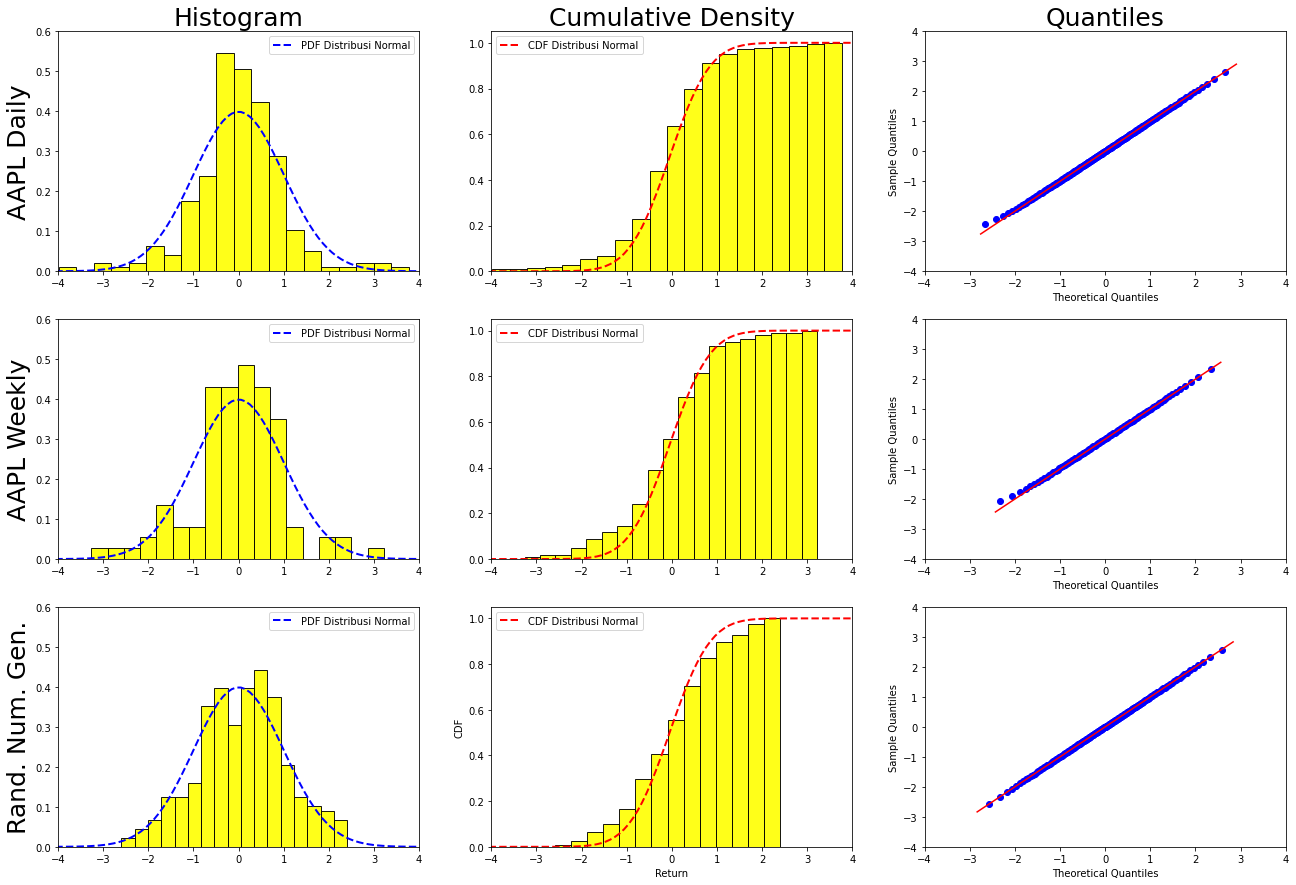

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(22,15))

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax[0,0].hist(norm_daily_return, bins=22, density=True, color='yellow', edgecolor='black', alpha=0.9)
ax[0,0].plot(x, scipy.stats.norm.pdf(x, mu, sigma), 'b--', linewidth=2, label='PDF Distribusi Normal')
ax[0,0].set_ylim([0, 0.6])
ax[0,0].set_ylabel('AAPL Daily', fontsize=25)
ax[0,0].set_xlim([-4, 4])
ax[0,0].set_title("Histogram", fontsize=25)
ax[0,0].legend()

ax[0,1].hist(norm_daily_return, bins=22, density=True, color='yellow', edgecolor='black', alpha=0.9, cumulative=True)
ax[0,1].plot(x, CY, 'r--', linewidth=2, label='CDF Distribusi Normal')
ax[0,1].set_xlim([-4, 4])
ax[0,1].set_title("Cumulative Density", fontsize=25)
ax[0,1].legend()

sm.qqplot(new_zvals_daily[1:], line ='45', ax=ax[0,2])
ax[0,2].set_ylim([-4, 4])
ax[0,2].set_xlim([-4, 4])
ax[0,2].set_title("Quantiles", fontsize=25)

# #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax[1,0].hist(norm_weekly_return, bins=18, density=True, color='yellow', edgecolor='black', alpha=0.9)
ax[1,0].plot(x, scipy.stats.norm.pdf(x, mu, sigma), 'b--', linewidth=2, label='PDF Distribusi Normal')
ax[1,0].set_ylabel('AAPL Weekly', fontsize=25)
ax[1,0].set_ylim([0, 0.6])
ax[1,0].set_xlim([-4, 4])
ax[1,0].legend()

ax[1,1].hist(norm_weekly_return, bins=19, density=True, color='yellow', edgecolor='black', alpha=0.9, cumulative=True)
ax[1,1].plot(x, CY, 'r--', linewidth=2, label='CDF Distribusi Normal')
ax[1,1].set_xlim([-4, 4])
ax[1,1].legend()

sm.qqplot(new_zvals_weekly[1:], line ='45', ax=ax[1,2])
ax[1,2].set_ylim([-4, 4])
ax[1,2].set_xlim([-4, 4])

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax[2,0].hist(norm_generator, bins=17, density=True, color='yellow', edgecolor='black', alpha=0.9)
ax[2,0].plot(x, scipy.stats.norm.pdf(x, mu, sigma), 'b--', linewidth=2, label='PDF Distribusi Normal')
ax[2,0].set_ylabel('Rand. Num. Gen.', fontsize=25)
ax[2,0].set_ylim([0, 0.6])
ax[2,0].set_xlim([-4, 4])
ax[2,0].legend()

ax[2,1].hist(norm_generator, bins=14, density=True, color='yellow', edgecolor='black', alpha=0.9, cumulative=True)
ax[2,1].plot(x, CY, 'r--', linewidth=2, label='CDF Distribusi Normal')
ax[2,1].set_xlabel('Return')
ax[2,1].set_ylabel('CDF')
ax[2,1].set_xlim([-4, 4])
ax[2,1].legend()

sm.qqplot(zvals, line ='45', ax=ax[2,2])
ax[2,2].set_ylim([-4, 4])
ax[2,2].set_xlim([-4, 4])
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

plt.show()